<a href="https://colab.research.google.com/github/Shridharshini2005/PRODIGY_DS_04/blob/main/sentimentPatterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 04:**

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitude towards specific topics or brands.

Dataset obtained from: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Uploading dataset:

In [2]:
df = pd.read_csv("/content/sample_data/twitter_training.csv", header=None, names=["tweet_id", "entity", "sentiment", "text"])

In [18]:
df.head()

,tweet_id,entity,sentiment,text,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


Pre-processing and cleaning data:

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [5]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower()
df['clean_text'] = df['text'].apply(clean_text)

Visualizing sentiment distribution:

/tmp/ipython-input-6-4199618334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


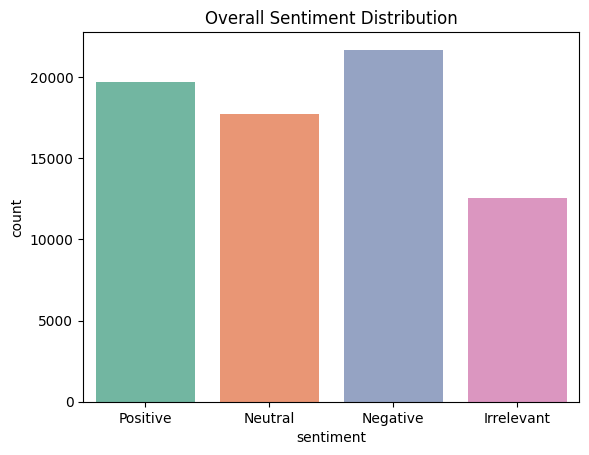

In [6]:
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Overall Sentiment Distribution')
plt.show()

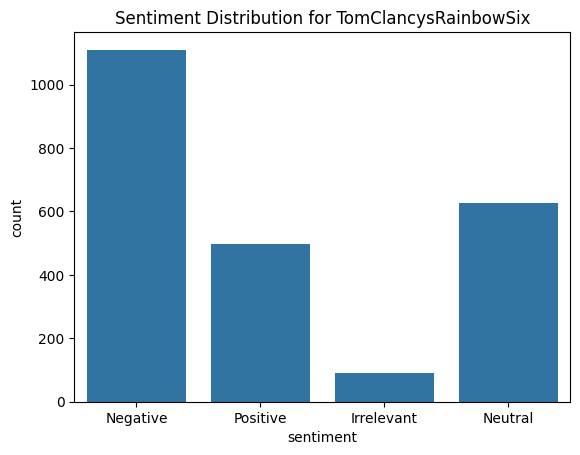

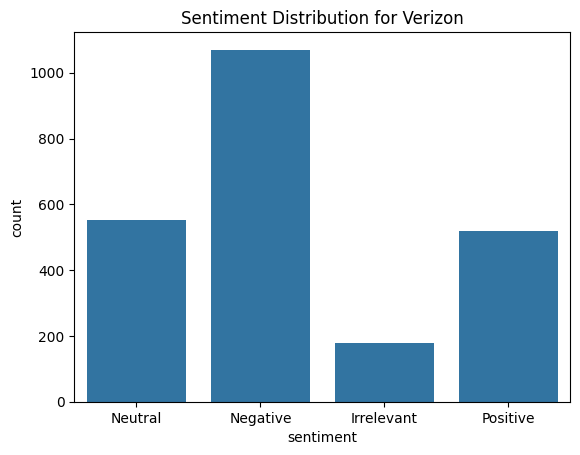

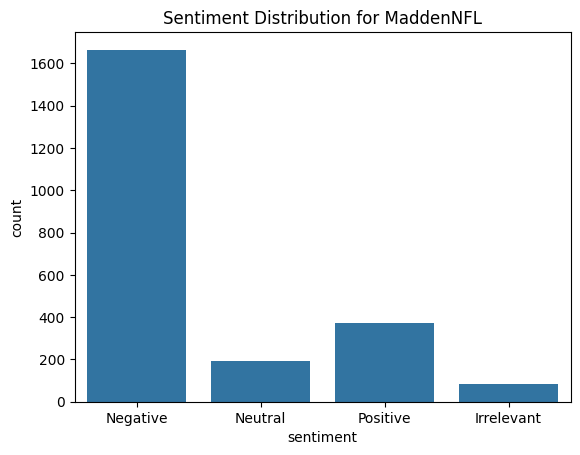

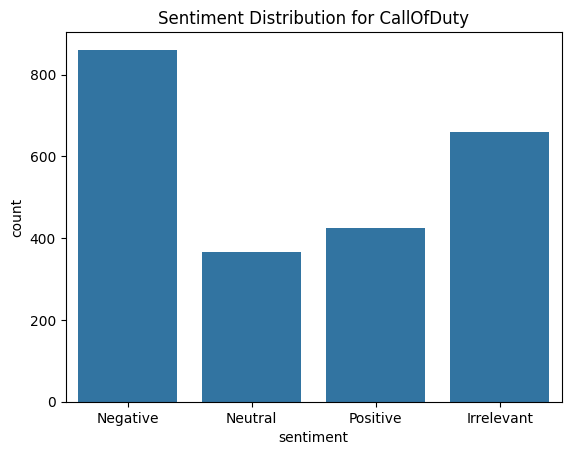

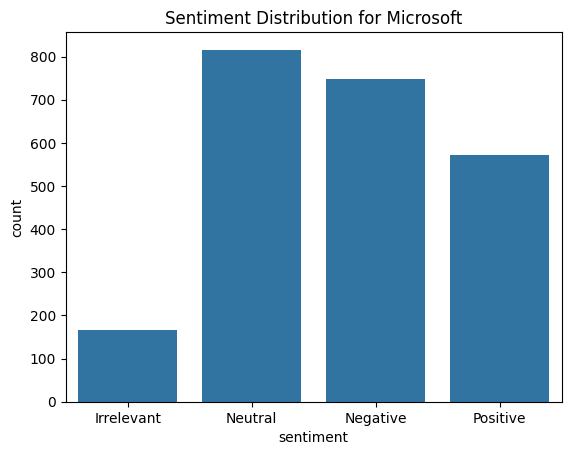

In [7]:
top_entities = df['entity'].value_counts().head(5).index
for entity in top_entities:
    sns.countplot(data=df[df['entity'] == entity], x='sentiment')
    plt.title(f'Sentiment Distribution for {entity}')
    plt.show()

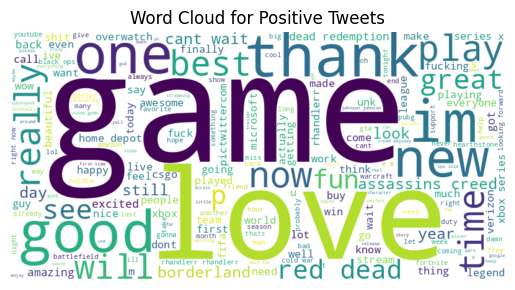

In [13]:
from wordcloud import WordCloud
for sentiment in ['Positive']:
  text = " ".join(df[df['sentiment'] == sentiment]['clean_text'])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for {sentiment} Tweets')
  plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

  Irrelevant       0.67      0.50      0.57      2529
    Negative       0.72      0.79      0.75      4383
     Neutral       0.65      0.64      0.64      3543
    Positive       0.67      0.72      0.69      3877

    accuracy                           0.68     14332
   macro avg       0.68      0.66      0.66     14332
weighted avg       0.68      0.68      0.68     14332



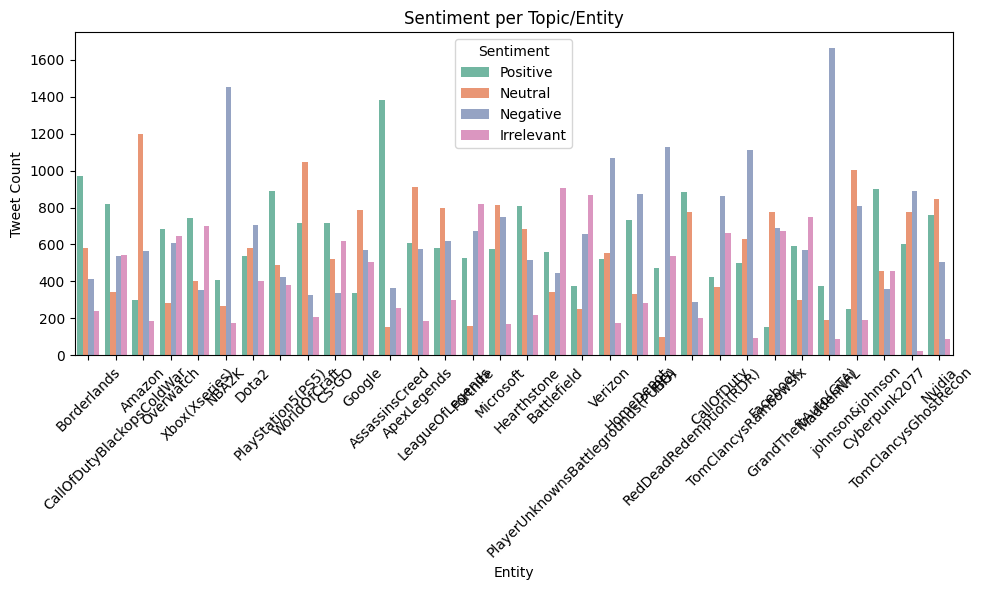

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='entity', hue='sentiment', palette='Set2')
plt.title('Sentiment per Topic/Entity')
plt.xticks(rotation=45)
plt.xlabel('Entity')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

Sentiment proportions represented by pie-chart:

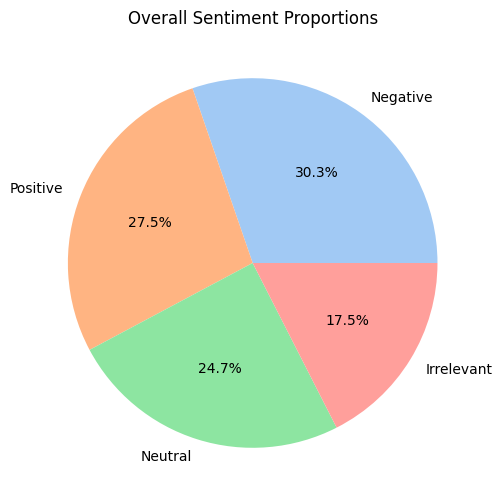

In [16]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Overall Sentiment Proportions')
plt.show()

**Conclusions:**

1. Negative sentiment (30.3%) is higher than positive (27.5%) and neutral (24.7%). This shows that many people are dissatisfied.
2. The word clouds for Positive sentiment featuring words like “love,” “amazing,” and “support,” highlights key expressions of positive opinion.
3. By identifying which topics generate more positive sentiment, brands and organisations can focus their communication strategies on that strengthen public perception and engagement.